In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data = np.load('./data_for_xi_calculation/dX_data_t=25_to_t=35_grid_32_decor_t_1Dt_config1.npz')

In [4]:
data.files

['dX_x', 'dX_y']

In [5]:
dX1 = data['dX_x']
dX2 = data['dX_y']

In [6]:
dX1.shape, dX2.shape

((250, 7392), (250, 7392))

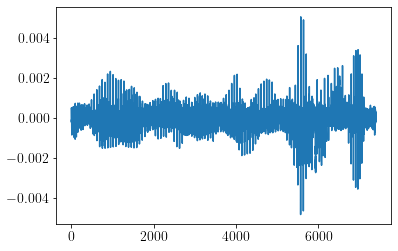

In [7]:
plt.plot(dX1[-1, :])

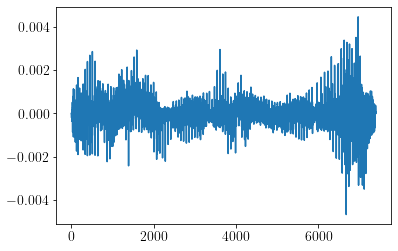

In [8]:
plt.plot(dX2[0, :])

In [9]:
dX = np.concatenate((dX1, dX2), axis=1)

In [10]:
def acf(x,lags):
    '''manually compute, non partial'''

    mean = np.mean(x)
    var = np.var(x)
    xp = x - mean
    corr = [1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return np.array(corr)

In [11]:
lag_vec = np.arange(100)

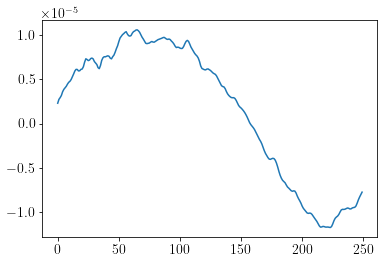

In [12]:
dX1_a = np.mean(dX1, axis=1)
plt.plot(dX1_a) 

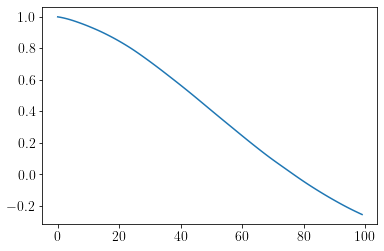

In [13]:
autocor = acf(dX1_a, lag_vec)
plt.plot(autocor)

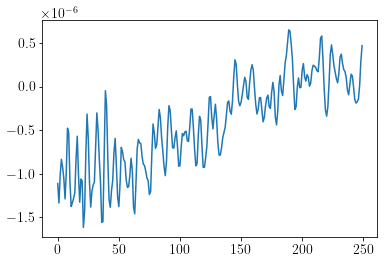

In [14]:
dX2_a = np.mean(dX2, axis=1)
plt.plot(dX2_a)

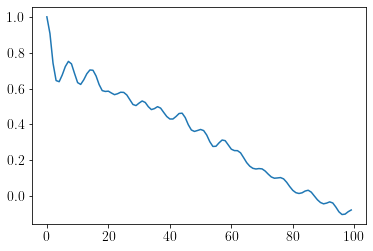

In [15]:
autocor = acf(dX2_a, lag_vec)
plt.plot(autocor)

In [17]:
n_nodes = dX1.shape[1] # total no. of nodes
print(f'no. of nodes: {n_nodes}')

no. of nodes: 7392


In [18]:
foo = np.mean(dX2, axis=0)
zero_n = 0
for i in foo:
    if i == 0:
        zero_n+=1
print(f"no. of nodes for which mean of the y component of res. disp. is exactly equal to zero: {zero_n}")

no. of nodes for which mean of the y component of res. disp. is exactly equal to zero: 106


In [19]:
print(f'mean of the y comp. of time series for all nodes: {foo}')

mean of the y comp. of time series for all nodes: [-6.55680430e-21  0.00000000e+00  4.26009784e-05 ... -6.74086331e-05
 -6.40965772e-19 -3.83164241e-19]


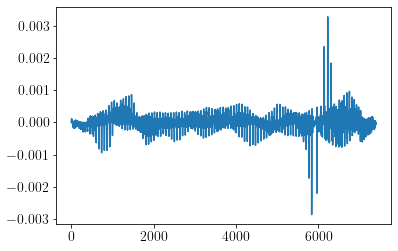

In [20]:
plt.plot(foo)

Unlike the x component of (u - u_avg), the y component can be exactly equal to zero for a node on the boundary at all times. We can remove these nodes from the total number.

In [21]:
autocor_mat_x = np.zeros(shape=(lag_vec.size, n_nodes)) # matrix containing ACF of all nodes for x-vel
for i in range(n_nodes):
    col_x = dX1[:,i]
    autocor_x = acf(col_x, lag_vec)
    autocor_mat_x[:,i] = autocor_x

In [22]:
autocor_mat_y = np.zeros(shape=(lag_vec.size, n_nodes - zero_n))
j = 0
for i in range(n_nodes):
    col_y = dX2[:,i]
    if np.mean(col_y) != 0.0: 
        autocor_y = acf(col_y, lag_vec)
        autocor_mat_y[:,j] = autocor_y
        j+=1

In [23]:
autocor_mat_x.shape, autocor_mat_y.shape

((100, 7392), (100, 7286))

In [24]:
mean_decor_x = np.mean(autocor_mat_x, axis=1) # taking the mean of autocor of all nodes (x vel)
mean_decor_y = np.mean(autocor_mat_y, axis=1) # taking the mean of autocor of all nodes (y vel)

Text(0, 0.5, '\\bf {ACF}')

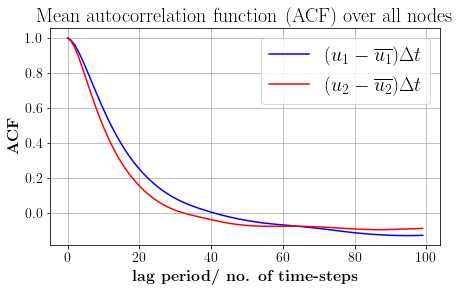

In [25]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(mean_decor_x, label=r'$(u_1 - \overline{u_1})\Delta t$', color='b')
ax.plot(mean_decor_y, label=r'$(u_2 - \overline{u_2})\Delta t$', color='red')
ax.legend()
ax.set_title(r'Mean autocorrelation function (ACF) over all nodes')
ax.grid(axis='both')
ax.set_xlabel(r'\bf{lag period/ no. of time-steps}')
ax.set_ylabel(r'\bf {ACF}')
# plt.savefig('./plots/plots_thesis/mean_acf_CM.pdf', bbox_inches='tight')

Text(0.5, 1.0, 'ACF of $({u_2} -\\overline{u_2}) \\Delta t$ at some nodes on the grid')

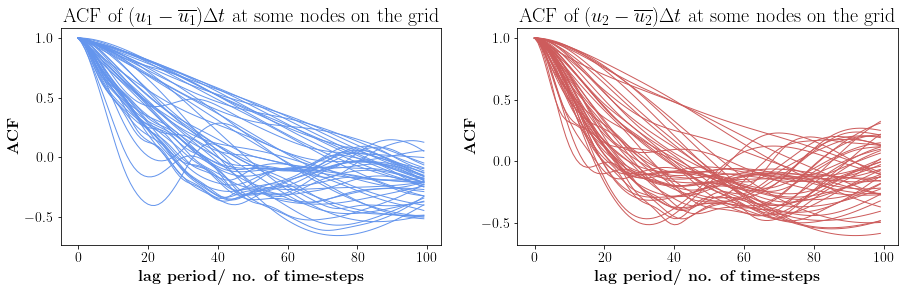

In [26]:
n_nodes = 50
fig,ax = plt.subplots(1,2,figsize=(15,4))
for i in range(n_nodes):
    autocor_x = autocor_mat_x[:,i]
    ax[0].plot(autocor_x, color='cornflowerblue', linewidth=1)
ax[0].set_ylabel(r'\textbf{ACF}')
ax[0].set_xlabel(r'\textbf{lag period/ no. of time-steps}')
ax[0].set_title(r'ACF of $({u_1} -\overline{u_1}) \Delta t$ at some nodes on the grid')
# use set_raterized to keep the transparency 
# ax[0].set_rasterized(True) # this works but the picture quality gets worse
# a work around is to use ligher colors

for i in range(n_nodes):
    autocor_y = autocor_mat_y[:,i]
    ax[1].plot(autocor_y, color='indianred', linewidth=1)
ax[1].set_ylabel(r'\textbf{ACF}')
ax[1].set_xlabel(r'\textbf{lag period/ no. of time-steps}')
ax[1].set_title(r'ACF of $({u_2} -\overline{u_2}) \Delta t$ at some nodes on the grid')
# ax[1].set_rasterized(True)
# plt.savefig('./plots/plots_thesis/acf_some_nodes_CM.pdf', bbox_inches='tight')